In [1]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def d_sig(z):
    s = sigmoid(z)
    return s * (1 - s)

In [3]:
X = np.arange(500)
y = (X % 2 == 0).astype(int)

In [4]:
W = np.random.randn(500, 2)
b = np.random.randn(500, 2)

In [5]:
print(f"{X.shape} {y.shape} {W.shape} {b.shape}")

(500,) (500,) (500, 2) (500, 2)


In [6]:
loss_values = []
eta = 0.01

for _ in range(1000):
    z0 = np.dot(X, W[:,0].T) + b[:,0]
    a0 = sigmoid(z0)

    z1 = np.dot(a0, W[:,1].T) + b[:,1]
    a1 = sigmoid(z1)

    loss = (np.sum((y - a1)**2)) / 500
    loss_values.append(loss)

    da1 = (a1 - y) * d_sig(z1)
    dw1 = np.dot(a0.T, da1) / 500
    db1 = np.sum(da1, axis=0) / 500

    da0 = np.dot(da1, W[:,1]) * d_sig(z0)
    dw0 = np.dot(X.T, da0) / 500
    db0 = np.sum(da0, axis=0) / 500

    W[:,1] -= eta * dw1
    b[:,1] -= eta * db1
    W[:,0] -= eta * dw0
    b[:,0] -= eta * db0


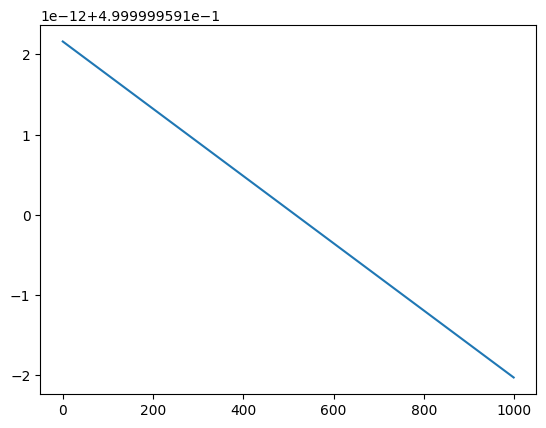

In [7]:
plt.plot(loss_values)
plt.show()

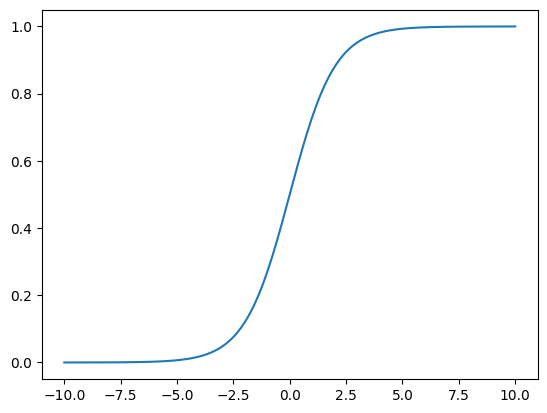

In [8]:
z = np.linspace(-10, 10, 200)

plt.plot(z, sigmoid(z))
plt.show()


In [14]:
X_test = np.random.randint(1, 501, 500)
y_test = (X_test % 2 == 0).astype(int)
X_test[:10]

array([230,  20, 475,  41, 438, 148, 108, 403,  84, 483])

In [15]:
z0 = np.dot(X_test, W[:,0].T) + b[:,0]
a0 = sigmoid(z0)

z1 = np.dot(a0, W[:,1].T) + b[:,1]
a1 = sigmoid(z1)

predictions = (a1 > 0.5).astype(int)

print("Test Inputs:", X_test[:5])
print("Predicted Output:", predictions[:5])


Test Inputs: [230  20 475  41 438]
Predicted Output: [1 0 1 1 0]


C:\Users\krish\AppData\Local\Temp\ipykernel_26172\2710954864.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
